In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data = pd.read_csv(url)
titanic_data.shape
# Display the first few rows of the dataset
print(titanic_data.head())

# Get a summary of the dataset
print(titanic_data.info())
print(titanic_data.describe())


# Fill missing values for 'Age' with the median
titanic_data.loc[:, 'Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())

# Fill missing 'Embarked' with the most common value
titanic_data.loc[:, 'Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])

# Drop 'Cabin' because it has too many missing values
titanic_data.drop(columns=['Cabin'], inplace=True)

# Drop rows with missing 'Fare'
titanic_data.dropna(subset=['Fare'], inplace=True)

# Create a new feature 'FamilySize'
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1

# Encode categorical features
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

# Drop unnecessary columns
titanic_data.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

# Define features and target variable
X = titanic_data.drop(columns=['Survived'])
y = titanic_data['Survived']

# Check for NaN values
print(X.isnull().sum())
print(y.isnull().sum())

# Ensure all features are numeric
print(X.dtypes)

# Check for infinite values
print(np.isfinite(X).all().all())
print(np.isfinite(y).all().all())

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check data after split
print(X_train.isnull().sum())
print(y_train.isnull().sum())
print(np.isfinite(X_train).all().all())
print(np.isfinite(y_train).all().all())

# Initialize and train the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

C:\Users\91859\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


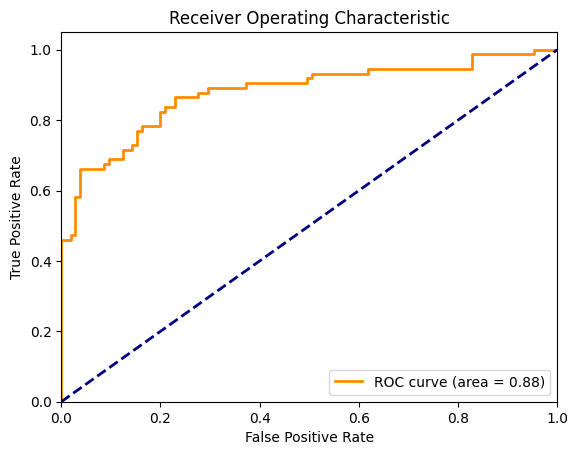

In [2]:
# The evaluation is already included in the previous section
# For further evaluation, we can plot the ROC curve if needed
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


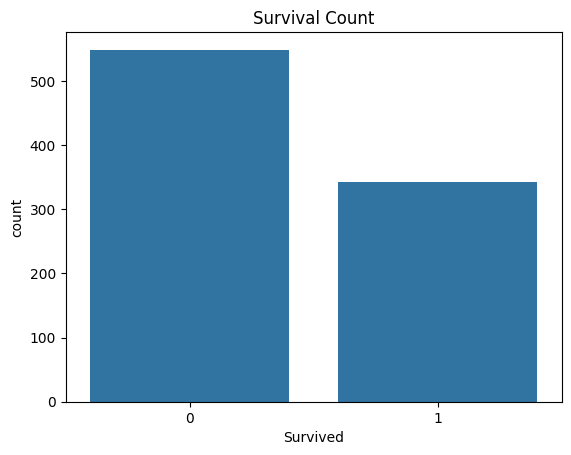

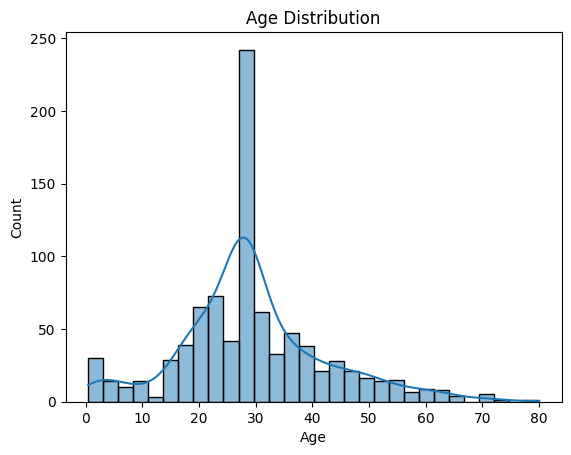

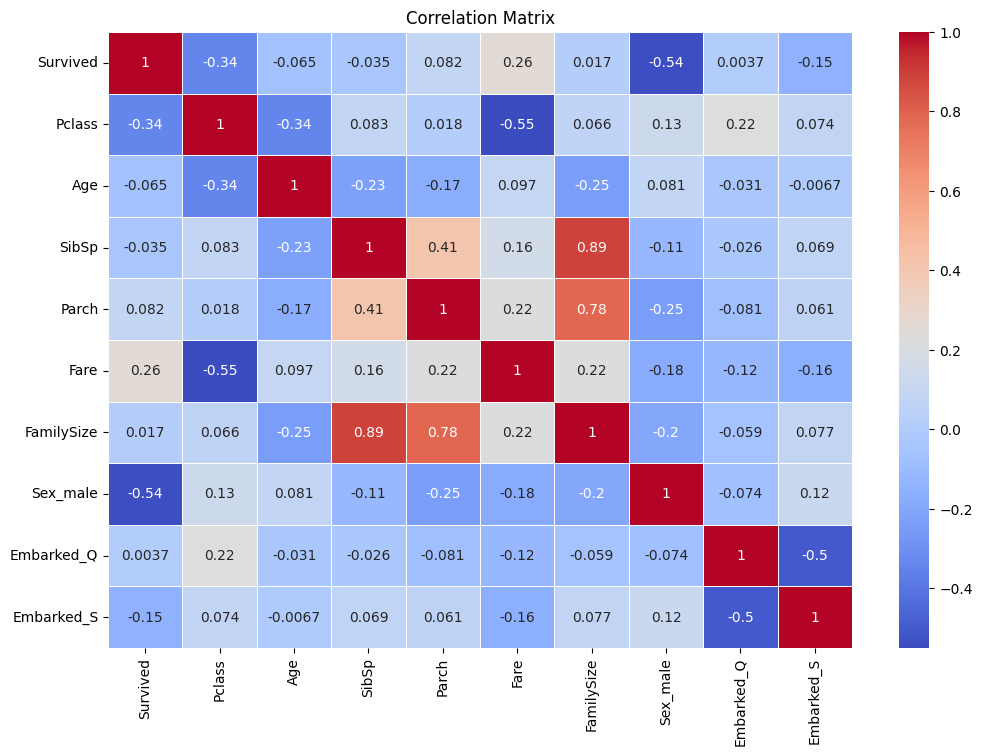

In [3]:
# Plot the distribution of passengers who survived vs. not survived
sns.countplot(x='Survived', data=titanic_data)
plt.title('Survival Count')
plt.show()

# Plot the distribution of age
sns.histplot(titanic_data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(titanic_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
